<a href="https://colab.research.google.com/github/avilashsrivastava/Mobile-Price-Range-Prediction/blob/main/Individual_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Mobile Price Range Prediction </u></b>

# **Introduction**
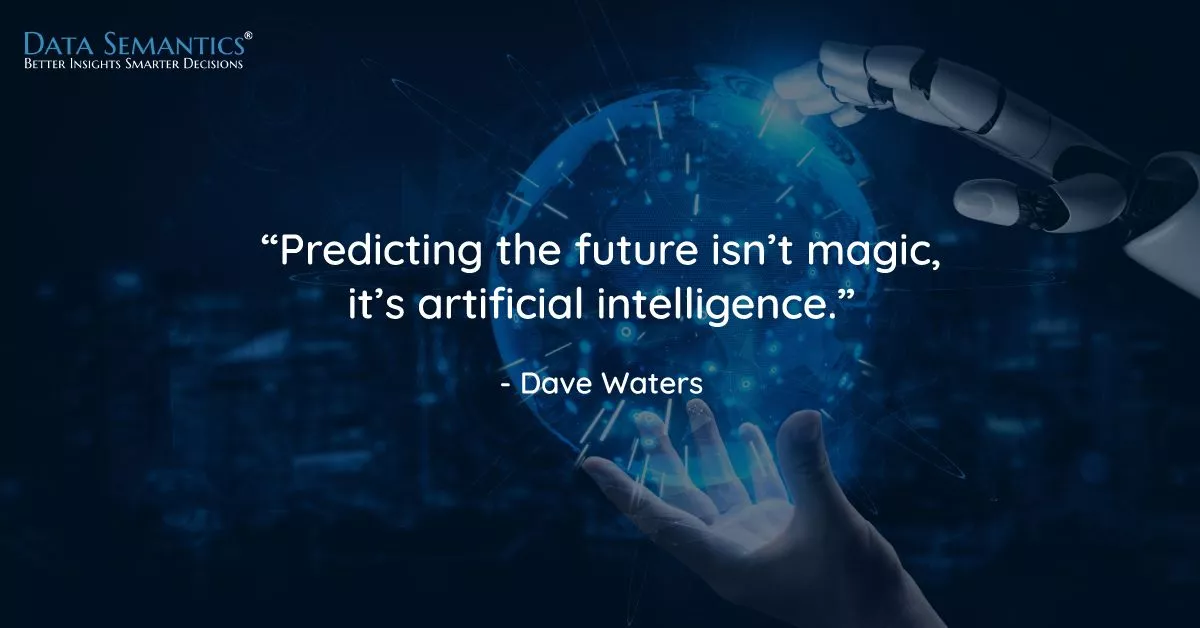

They say 'Time' is an illusion. All three; the past, present and future exist at the same time. Well, Iam not here to judge this statement but to provoke an understanding of how, everything seems correlated, sometimes. There is an old saying that if you can sense the future, you can change your present, maybe even your past. Imagine you could change your past, where you did a terrible mistake, or imagine changing that one decision you took, that could have taken your life on a prosperous path. But you know thats not going to happen, not now but maybe in the future. Maybe someone actually builds a Time Machine!

Well philosophies apart, looking at the pace at which Artificial Intelligence is evolving, we may soon reach at a level to manipulate time. But its still a long distance to go. Now you may think AI or machine learning is at the baby stage and still trying to learn about this world. Even at a preliminary stage it is performing wonders, way beyond human capabilities.

AI or MI is now being used in every feilds, handling huge amounts of data, identifying trends, relations and performing predictions. You see now, how we have started to predict future! (not perfectly but close enough). These predictions are now helping to make our thought process more optimistic and to be prepared for the future.

That being said, in this exercise, Iam going to implement one of the use cases of machine learning in predicting the range of prices a modern day mobile phone would have, given its specifications. We will see how these predictions can help a business or a person to make better decisions. The contents of the kernel include:

1. <b> Exploratory data analysis:</b> In this section we will try to fetch the story hidden in the dataset we have.

2. <b> Data Wrangling:</b> In this section we will make our data clean of all impurities and make it 'Modelling" ready!

3. <b> Splitting the data and Standardization:</b> In this section we will split our data into training and test set and apply transformation.

4. <b> Fitting models:</b> In this section we will implement various machine learning algorithms to make predictions.

5. <b> Model Explainability:</b> In this section we will see the working of our model.

6. <b> Conclusion:</b> Finally, we will point down our observations and calculations.

Lets do it!

In [1]:
# importing libraries that will help us in our endeavour
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier




# to not get tensed over unnecessary warnings we will ignore them
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# loading the data
directory_path='/content/drive/MyDrive/Almabetter/Mobile Price Range Prediction - Avilash Srivastava/'
mobile_df=pd.read_csv(directory_path + 'data_mobile_price_range.csv')

# Note: Please change the directory path of the file when running in different system

In [4]:
# taking an initial look at the data
mobile_df.head(5)

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0            842     0          2.2  ...             0     1            1
1           1021     1          0.5  ...             1     0            2
2            563     1          0.5  ...             1     0            2
3            615     1          2.5  ...             0     0            2
4           1821     1          1.2  ...             1     0            1

[5 rows x 21 columns]

In [5]:
 # tail part
 mobile_df.tail(5)

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
1995            794     1          0.5  ...             1     0            0
1996           1965     1          2.6  ...             1     1            2
1997           1911     0          0.9  ...             1     0            3
1998           1512     0          0.9  ...             1     1            0
1999            510     1          2.0  ...             1     1            3

[5 rows x 21 columns]

In [6]:
# lets have a look at the colulms
print('The columns in the dataset are:\n',mobile_df.columns.to_list())
print('\nThe no. of columns present in the dataset are: ',len(mobile_df.columns.to_list()))

The columns in the dataset are:
 ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']

The no. of columns present in the dataset are:  21


In [7]:
# lets check the no. of rows we have
print('The no. of rows in the dataset are: ',len(mobile_df))

The no. of rows in the dataset are:  2000


In [8]:
# lets see how many data types we have 
mobile_df.info()
print('\nThe data types we have are: float and integers')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Understanding Problem Statement**

Mobile phones have become the greatest necessity for almost all individuals nowadays. People want more features and best specifications in a phone and that too at cheaper prices. The demand for phones is so high that there is a huge competition prevailing between mobile manufacturers. To stay ahead in the race, these companies try to bring in new features and innovations so that people are lured towards buying their brand smartphones. 

Price of a mobile phone is influenced by various factors. Brand name, newness of the model, specifiactions such as internal memory, camera, ram, sizes, connectivity etc., are some of the important factors in determining the price.
As a business point of view, it becomes an utmost priority to analyse these factors from time to time and come up with best set of specifications and price ranges so that people buy their mobile phones.

Hence, through this exercise and our predictions we will try to help companies estimate price of mobiles to give tough competion to other mobile manufacturer and also it will be usefull for customers to verify that they are paying best price for a mobile.

To start with let us look at the features/variables/columns we have in our dataset and see what they mean:

1. Battery_power - Total energy a battery can store in one time measured in mAh

2. Blue - Has bluetooth or not

3. Clock_speed - speed at which microprocessor executes instructions

4. Dual_sim - Has dual sim support or not

5. Fc - Front Camera mega pixels

6. Four_g - Has 4G or not

7. Int_memory - Internal Memory in Gigabytes

8. M_dep - Mobile Depth in cm

9. Mobile_wt - Weight of mobile phone

10. N_cores - Number of cores of processor

11. Pc - Primary Camera mega pixels

12. Px_height - Pixel Resolution Height

13. Px_width - Pixel Resolution Width

14. Ram - Random Access Memory in Mega Bytes

15. Sc_h - Screen Height of mobile in cm

16. Sc_w - Screen Width of mobile in cm

17. Talk_time - longest time that a single battery charge will last when you are on call

18. Three_g - Has 3G or not

19. Touch_screen - Has touch screen or not

20. Wifi - Has wifi or not

21. Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).


# **1. Exploratory Data Analysis**

EDA is the basic necessity one should perform before applying any model. It is the process in which we try to find relationships, identify patterns and basically understand the story which the data has to tell. We analyse the importance of features and their impact on our target variable. This way we make sure our model is fed with the relevant features and also be able to explain the data itegrity.

There are 2 steps in basic EDA namely; Univariate analysis(analysing single feature at a time), multivariate analysis(analysing 2 or more features). Lets have a look at them.

In [9]:
# first let us see the descriptive stats of all the features
mobile_df.describe()

battery_power       blue  ...         wifi  price_range
count    2000.000000  2000.0000  ...  2000.000000  2000.000000
mean     1238.518500     0.4950  ...     0.507000     1.500000
std       439.418206     0.5001  ...     0.500076     1.118314
min       501.000000     0.0000  ...     0.000000     0.000000
25%       851.750000     0.0000  ...     0.000000     0.750000
50%      1226.000000     0.0000  ...     1.000000     1.500000
75%      1615.250000     1.0000  ...     1.000000     2.250000
max      1998.000000     1.0000  ...     1.000000     3.000000

[8 rows x 21 columns]

It looks like we have some dichotomous type variables such as bluetooth, wifi, 3g, 4g, dual_sim and touch screen.
We have some nominal type such a n_cores and m_deep. We also have clock_speed, fc, pc, sc_h, sc_w, talktime whose range is low. We also have other numerical variables whose range is pretty high.

### **Univariate Analysis**

In this section we try to analyse each features independently and see their structure, categories, distribution and statistics.

<b>1. First thing first! Our dependent variable (in short - dv) - 'Price Range'</b>

In [10]:
# checking the categories of dv
print('The categories of price range are: ',mobile_df['price_range'].unique().tolist())

The categories of price range are:  [1, 2, 3, 0]


where,

0 is for low price

1 is for medium price 

2 is for high price and

3 is for very high price

In [11]:
# let us see the count of each of these categories
mobile_df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

Text(0.5, 1.0, 'Count of price range')

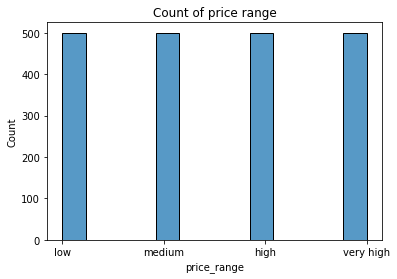

In [12]:
# visualize the count
xtick=[0,1,2,3]
label=['low','medium','high','very high']
sns.histplot(data=mobile_df['price_range'])
plt.xticks(xtick,label)
plt.title('Count of price range')

It look like we have equal no. of observations for each price range

<b> 2. Bluetooth, 4g, 3g, dual_sim, wifi, Touchscreen

These features have boolean type values i.e., whether or not each phone have these specification or not. So we can  analyse them together.

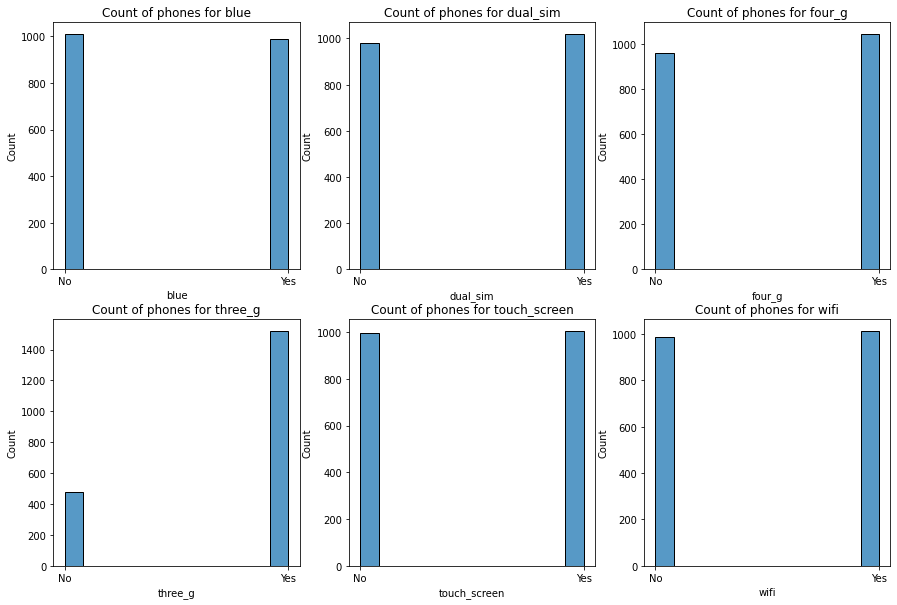

In [13]:
# creating a list of these variables
list1=['blue','dual_sim','four_g','three_g','touch_screen','wifi']

# visualizing the count of each by running a for loop
plt.figure(figsize=(15,10))
for index,item in enumerate(list1):
  plt.subplot(2,3,index+1)
  xtick=[0,1]
  label=['No','Yes']
  plt.xticks(xtick,label)
  sns.histplot(mobile_df[item])
  plt.title(f'Count of phones for {item}')

It looks like we have equal no. of obseravtion for all except 3g where 75% is one class.

<b> 3. n_cores and m_dep

n_cores tells us the number of cores of the processor. m_dep tells us the thickness of the mobile phone.

In [14]:
# finding the no of cores we have
print('The no. of cores we have in our dataset are: ',sorted(list(mobile_df['n_cores'].unique())))

The no. of cores we have in our dataset are:  [1, 2, 3, 4, 5, 6, 7, 8]


Text(0.5, 1.0, 'Count of each cores of processor')

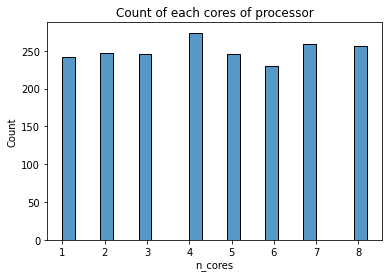

In [15]:
# visualizing the count of each cores
sns.histplot(mobile_df['n_cores'],binwidth=0.3)
plt.title('Count of each cores of processor')

In [16]:
# finding the depth values we have
print('The no. of cores we have in our dataset are: ',sorted(list(mobile_df['m_dep'].unique())))

The no. of cores we have in our dataset are:  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


Text(0.5, 1.0, 'Count of each depth values(cm)')

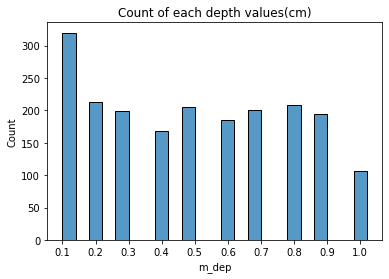

In [17]:
# visualizing the count of each depth values
xtick=sorted(list(mobile_df['m_dep'].unique()))
sns.histplot(mobile_df['m_dep'],binwidth=0.04)
plt.xticks(xtick)
plt.title('Count of each depth values(cm)')

It looks like we have almost equal no. of observations for each cores with highest observation for 4 cores.

Also count for depth values from 0.2 to 0.9 is somewhat same. There is higher no. of observations for 0.1 depth and least observations for 1 cm depth.

<b> 4. Variables having low range values - clock_speed, fc, pc, sc_h, sc_w, talktime

Text(0.5, 1.0, 'Box plot for low range variables')

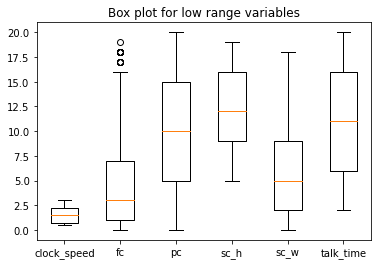

In [18]:
# visualizing stats of these variables using box plots
xtick=[1,2,3,4,5,6]
label=['clock_speed','fc','pc','sc_h','sc_w','talk_time']
plt.boxplot(mobile_df[['clock_speed','fc','pc','sc_h','sc_w','talk_time']].values)
plt.xticks(xtick,label)
plt.title('Box plot for low range variables')


Mean value for clock speed is around 1.5 and min and max values are 3 and 0.5 respectively.

Mean value of front camera and primary camera mega pixel is around 3 and 10 and min and max values are 19, 0 for front and 20, 0 for primary.

Mean value of screen height and width is around 12 and 5 and min and max values are 19, 5 for height and 18, o for width.

Mean value of talktime is around 11 and min amd max values are 20 and 2.

<b> 5. Variables having medium range values - internal memory, mobile weight


Text(0.5, 1.0, 'Box plot for medium range variables')

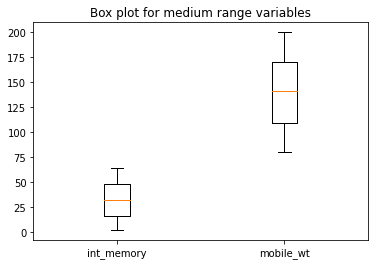

In [19]:
# visualizing stats of these variables using box plots
xtick=[1,2]
label=['int_memory','mobile_wt']
plt.boxplot(mobile_df[['int_memory','mobile_wt']].values)
plt.xticks(xtick,label)
plt.title('Box plot for medium range variables')

Mean value for internal memory is around 32 and min and max values are 64 and 2.

Mean value for weight is around 141 and min amd max values are 200 and 80.

<b> 6. Variables having high range values: Battery power, pixel height, pixel width, ram

Text(0.5, 1.0, 'Box plot for high range variables')

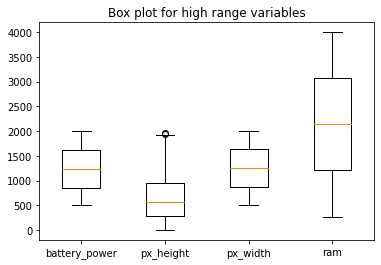

In [20]:
# visualizing stats of these variables using box plots
xtick=[1,2,3,4]
label=['battery_power','px_height','px_width','ram']
plt.boxplot(mobile_df[['battery_power','px_height','px_width','ram']].values)
plt.xticks(xtick,label)
plt.title('Box plot for high range variables')

Mean value for battery power is around 1226 and min and max values are 1998 and 501.

Mean value for pixel height and width is around 564 and 1247 and min and max values are 1960,0 for height and 1998,500 for width.

Mean value for ram is around 2146 and min and max values are 3998 and 256.

<b> Conclusion from univariate analysis:</b>
1. We have seen the count of observations for each variables and their descriptive stats.

2. It seems like all the variables are properly structured and have a role in determining our dv.

Let us try to confirm our statement by doing multivariate analysis. This will show the actual impact of these variables on our dv.


### **Multivariate analysis**

In this section we will try to find relationship of each variables, their importance and impact on our dependent variable.

Let us first start by finding the correlation between each one of them. We will use heatmap which is a beautiful visualization technique to show correlations.

**1. Correlation**

Text(0.5, 1.0, 'Heatmap')

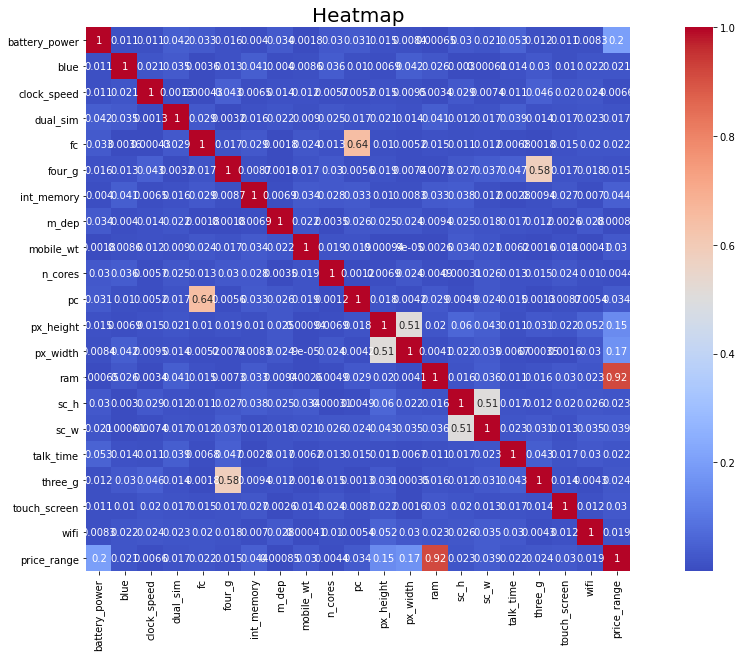

In [21]:
# finding correlation using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(abs(mobile_df.corr()),annot=True, cmap='coolwarm',square=True)
plt.title('Heatmap',fontsize=20)

Points to note:

1. pc is correlated with fc.

2. 3g and 4g are moderately correlated.

3. sc_h and sc_w are moderately correlated. We will try to change them into a single variable.

4. px_width and px_height are moderately correlated. We will try to change them into a single variable.

5. ram is highly correlated with our price range. May be one the most important factor in determining the price.


<b> 2. Bluetooth, 4g, 3g, dual_sim, wifi, Touchscreen vs price range

In [22]:
# grouping price range with each of these variables
mobile_df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()

blue      dual_sim      four_g      three_g      touch_screen      wifi     
     0    1        0    1      0    1       0    1            0    1    0    1
0  257  243      250  250    241  259     127  373          238  262  252  248
1  255  245      245  255    238  262     122  378          239  261  248  252
2  257  243      251  249    253  247     113  387          265  235  248  252
3  241  259      235  265    225  275     115  385          252  248  238  262

Text(0, 0.5, 'No. of phones')

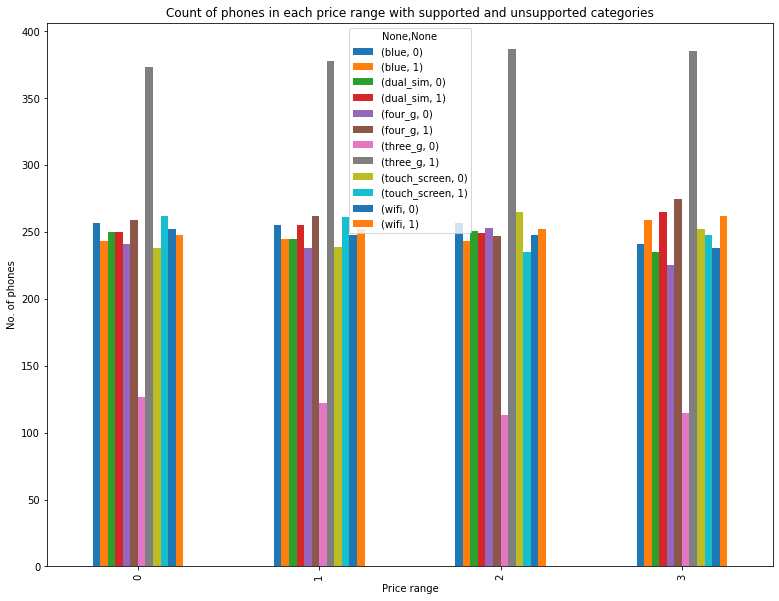

In [23]:
# visualizing using barplot
plt.rcParams['figure.figsize']=(13,10)
mobile_df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack().plot.bar()
plt.title('Count of phones in each price range with supported and unsupported categories')
plt.xlabel('Price range')
plt.ylabel('No. of phones')

It looks like all the price ranges have almost equal no. of observations for both supported and unsupported type specifications.

<b> 3. n_cores and m_depth vs price range

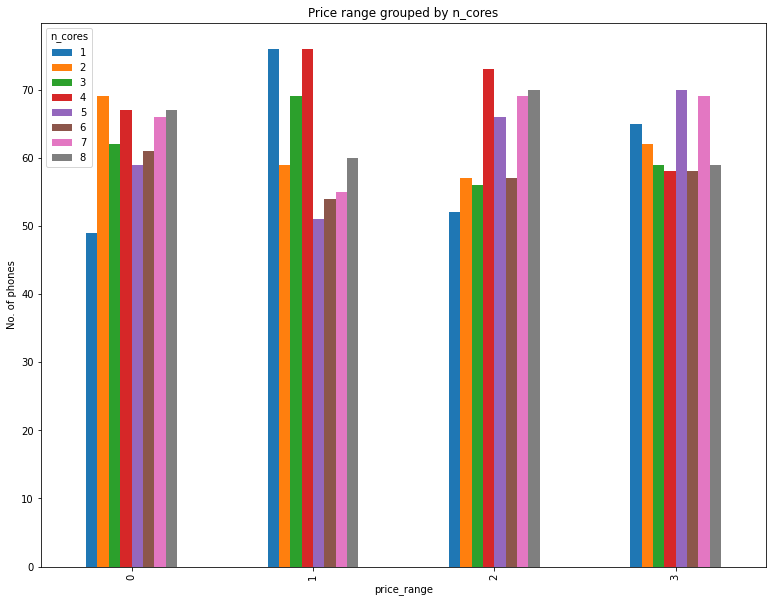

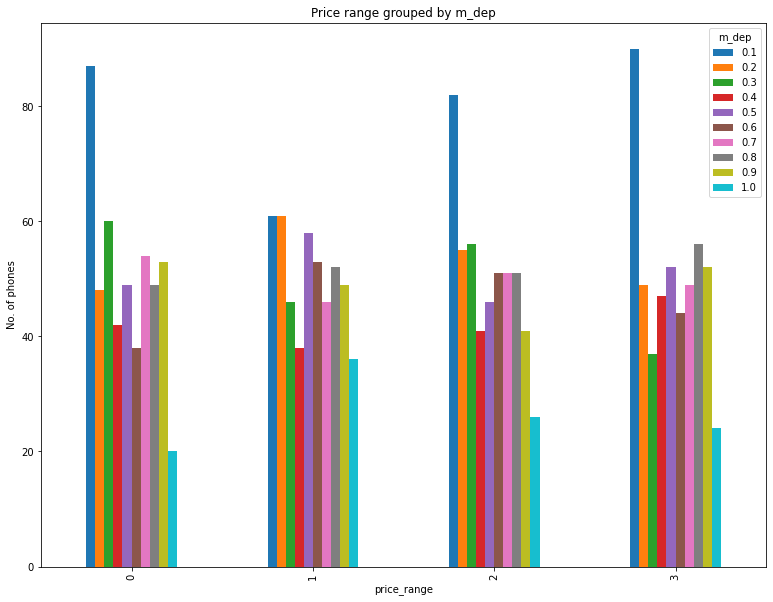

In [24]:
# grouping price range with n_cores and m_dep and visualizing 
list1=['n_cores','m_dep']
for item in list1:
  mobile_df.groupby(['price_range'])[item].value_counts().unstack().plot.bar()
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

1. Count of less n_cores is high for 0 and 1 price range.

2. Count of high n_cores is high for 2 and 3 price range.

3. Count of phones with less thickness is high and count of phones with high thickness is low.

<b> 4. Variables having low range values - clock_speed, fc, pc, sc_h, sc_w, talktime vs price range

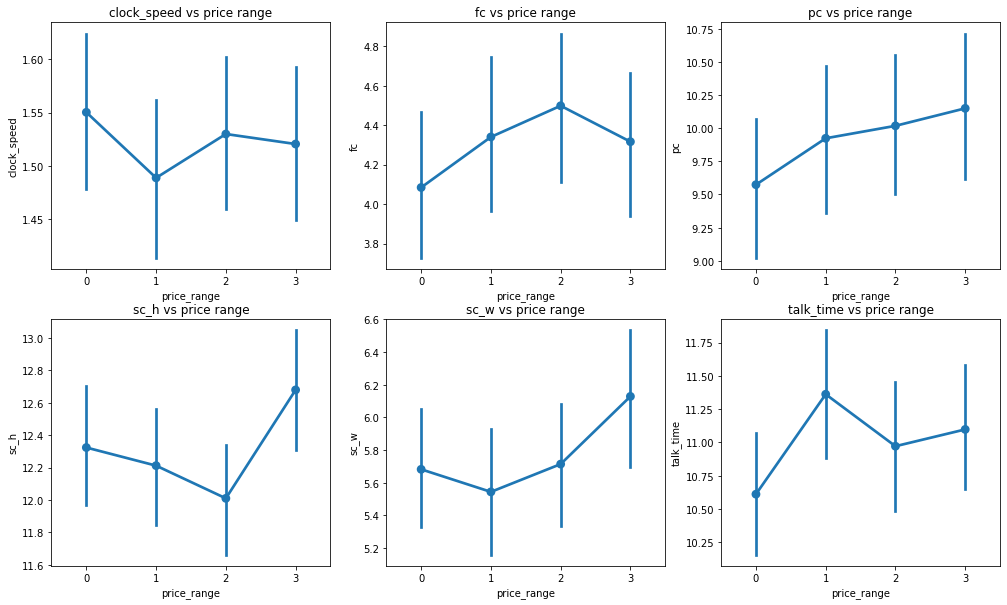

In [25]:
# visualizing price range grouped by these variables using pointplot
list1=['clock_speed','fc','pc','sc_h','sc_w','talk_time']
plt.figure(figsize=(17,10))
for index,item in enumerate(list1):
  plt.subplot(2,3,index+1)
  sns.pointplot(x='price_range',y=item,data=mobile_df)
  plt.title(f'{item} vs price range')

Point plot shows us the estimate of central tendency of numerical type variables with estimate error.

1. For low range price(0), the clock speed is high

2. price range is increasing with increase in front camera and primary camera megapixel.

3. screen height and width decrease initially for increase in price range but then increses.

4. talk time is higher for high range phones comparatively.

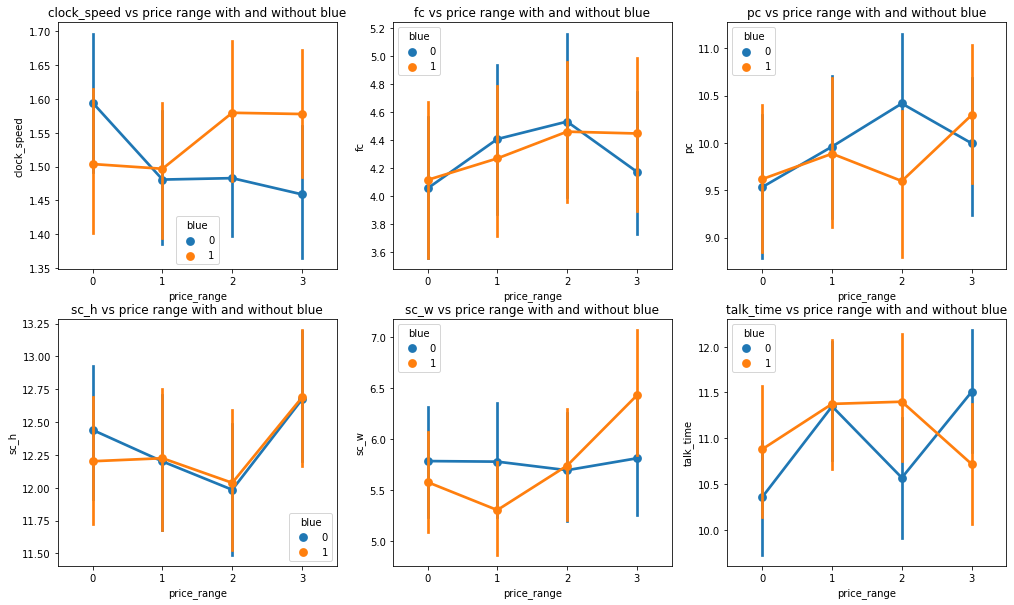

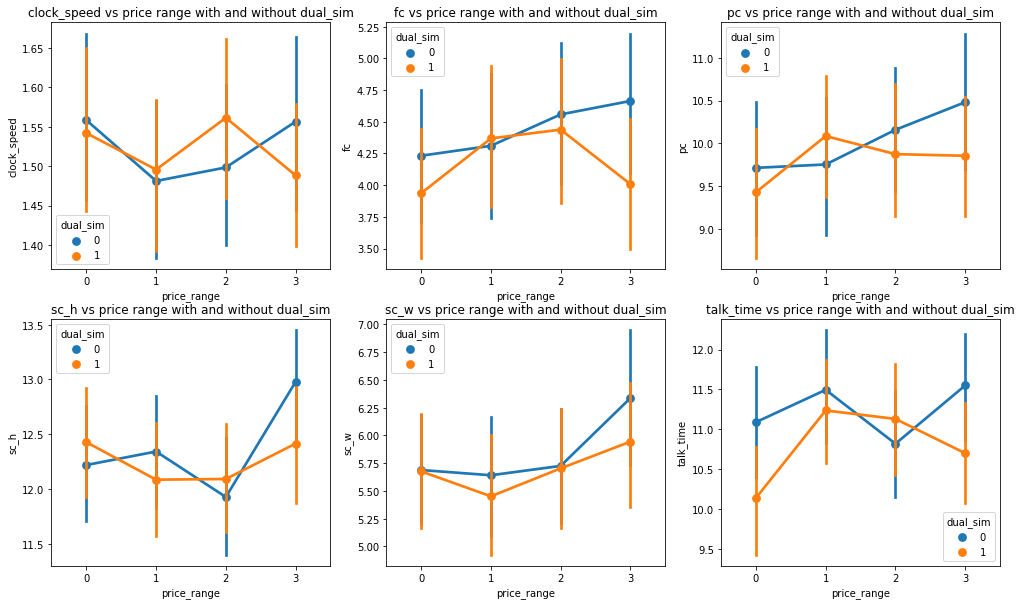

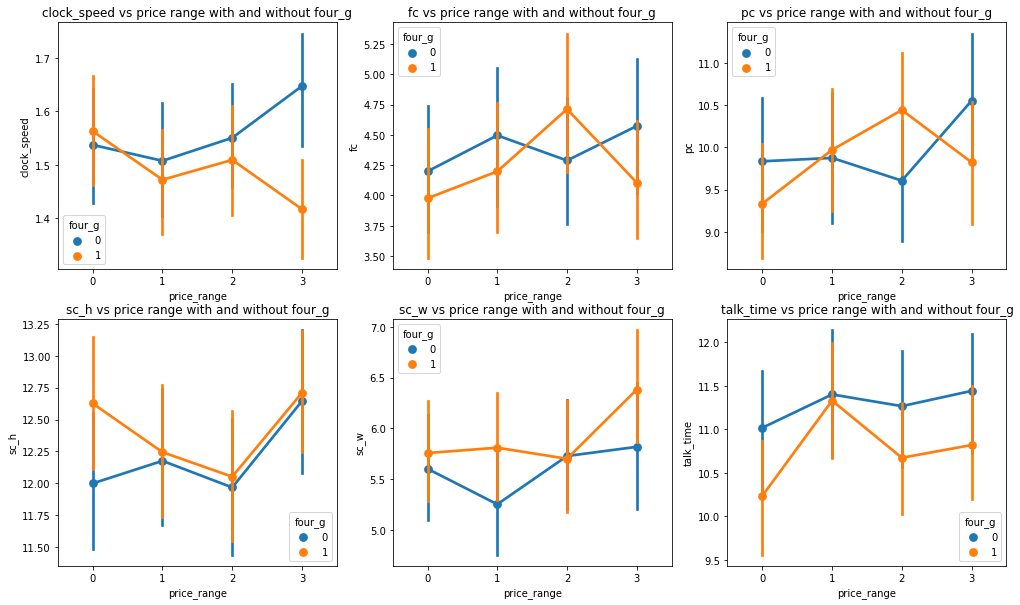

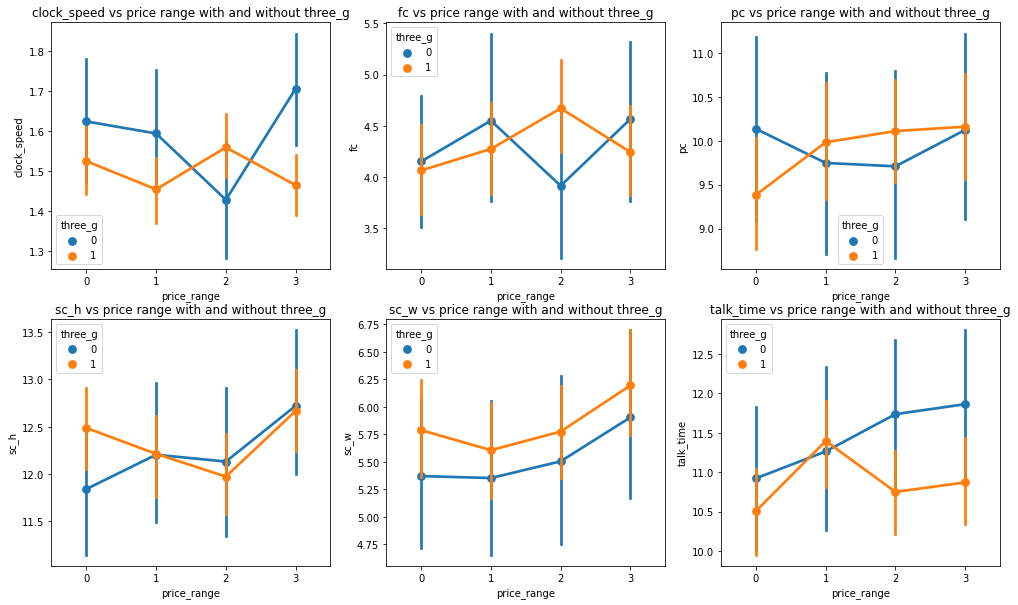

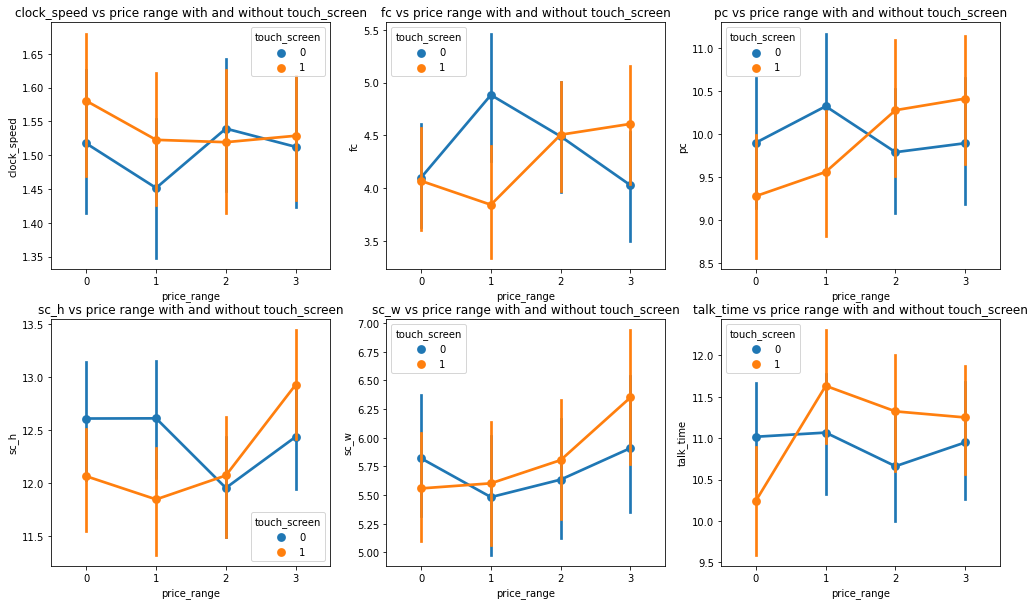

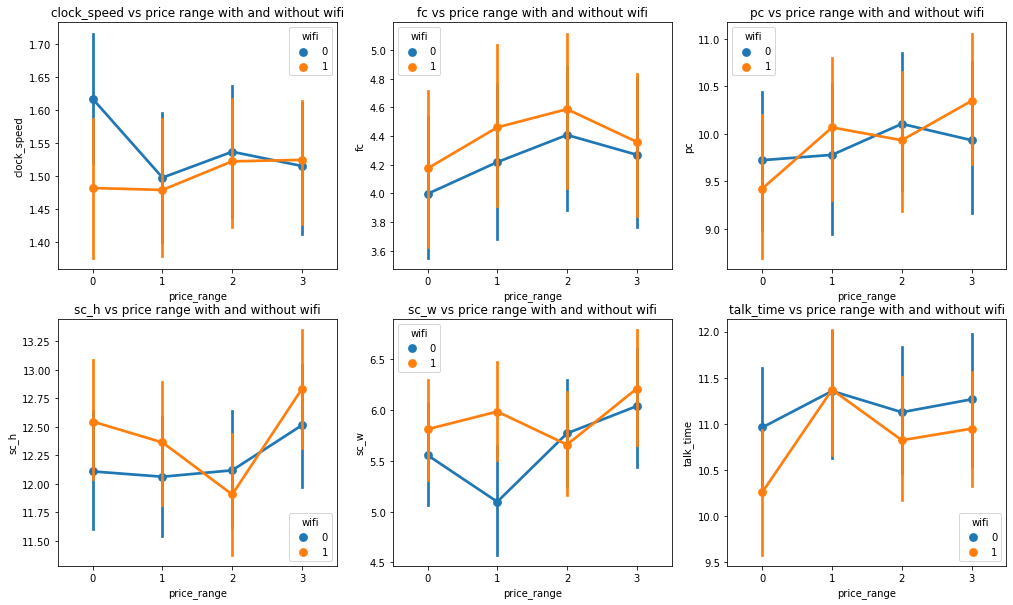

In [26]:
# visualizing price range grouped by these variables with supported and unsupported categories
list1=['blue','dual_sim','four_g','three_g','touch_screen','wifi']
list2=['clock_speed','fc','pc','sc_h','sc_w','talk_time']
for i in list1:
  plt.figure(figsize=(17,10))
  for index,item in enumerate(list2):
    plt.subplot(2,3,index+1)
    sns.pointplot(x='price_range',y=item,hue=i,data=mobile_df)
    plt.title(f'{item} vs price range with and without {i}')

Looking at the graphs above some major observations that could be drawn are:

1. Clock speed is less for high range phones with no bluetooth.

2. Significant difference in talktime for bluetooth supported and unsupported.

3. Clock speed is less for high range phones with 4g support and high for no 4g.

4. Talk time is less for 4g supported device.

5. Front camera and primary camera megapixels is increasing higher with price range for touch screen phones.

<b> 5. Variables having medium range values - internal memory, mobile weight
vs price range

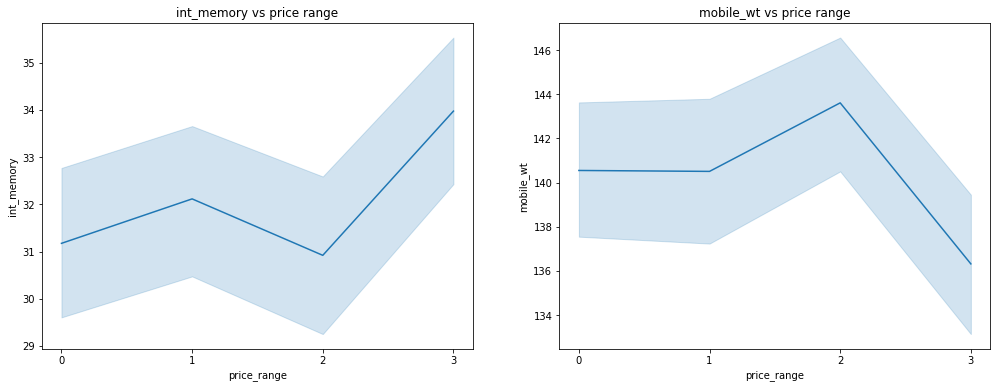

In [27]:
# visualizing price range grouped by these variables using lineplot
list1=['int_memory','mobile_wt']
plt.figure(figsize=(17,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,2,index+1)
  sns.lineplot(x='price_range',y=item,data=mobile_df)
  plt.xticks(xtick)
  plt.title(f'{item} vs price range')

1. We can observe drastic increase in internal memory for very high prices.

2. Also there is drastic decrease in mobile weight for very high prices.

<b> 6. Variables having high range values: Battery power, pixel height, pixel width, ram vs price range

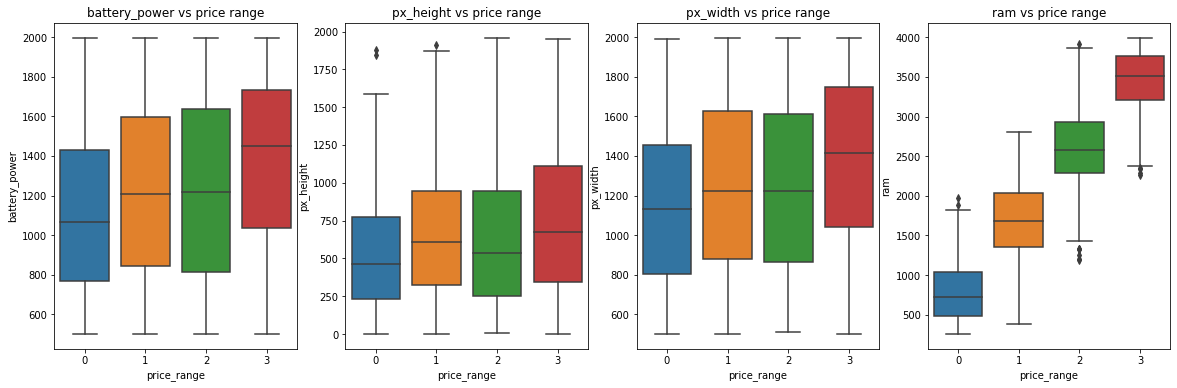

In [28]:
# visualizing price range grouped by these variables using boxplot
list1=['battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,4,index+1)
  plt.xticks(xtick)
  sns.boxplot(x='price_range',y=item,data=mobile_df)
  plt.title(f'{item} vs price range')

Mean values of battery power, px_height, px_width, ram is increasing with increase in prices.

Let us also visualize using line plot that will show us a clear trend.

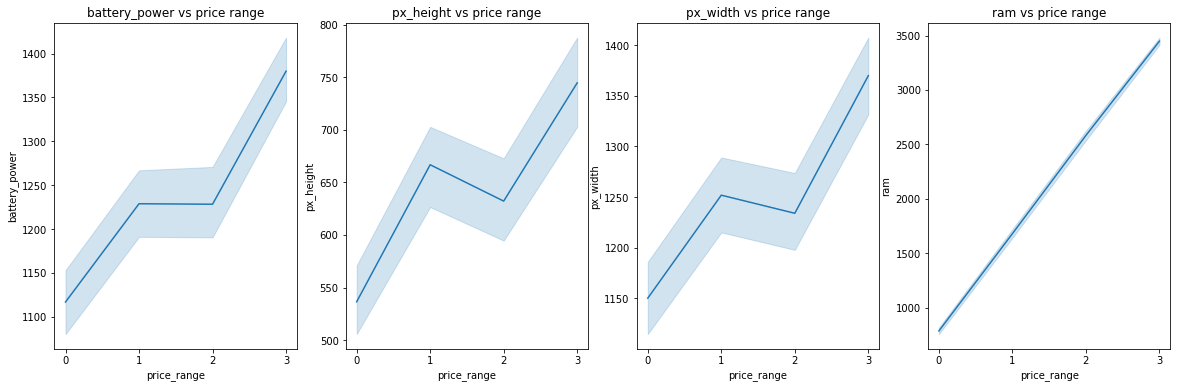

In [29]:
# visualizing price range grouped by these variables using lineplot
list1=['battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,4,index+1)
  plt.xticks(xtick)
  sns.lineplot(x='price_range',y=item,data=mobile_df)
  plt.title(f'{item} vs price range')

It looks like the values of these variables are in increasing trend with increase in prices. Ram is having a direct impact. Higher ram, higher prices!

Let us now visualize these variables with supported and unsupported categories and see if there is some changes.

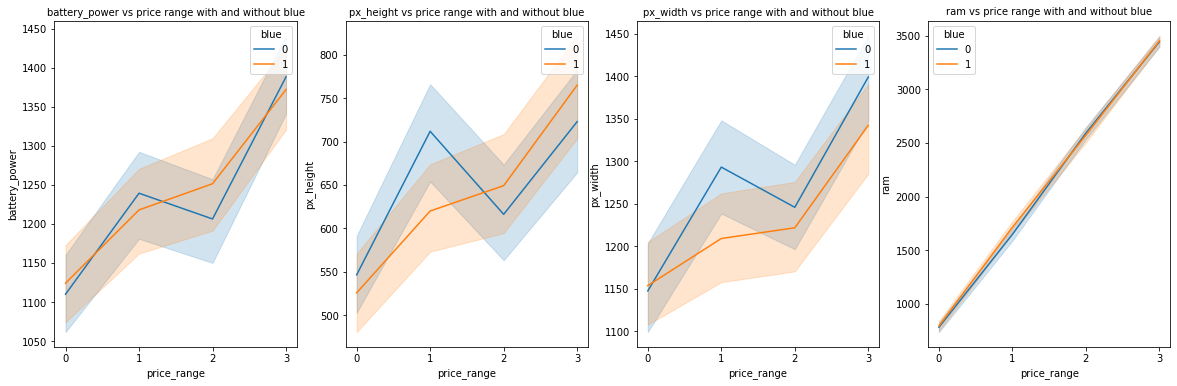

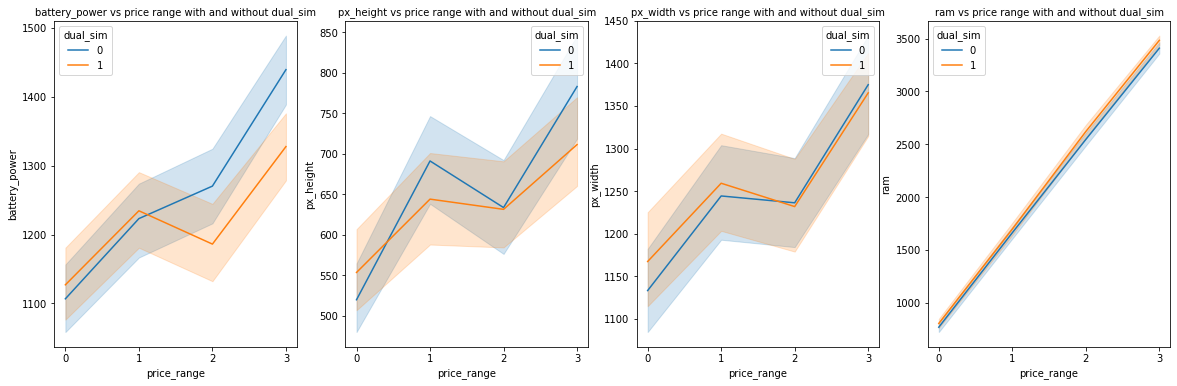

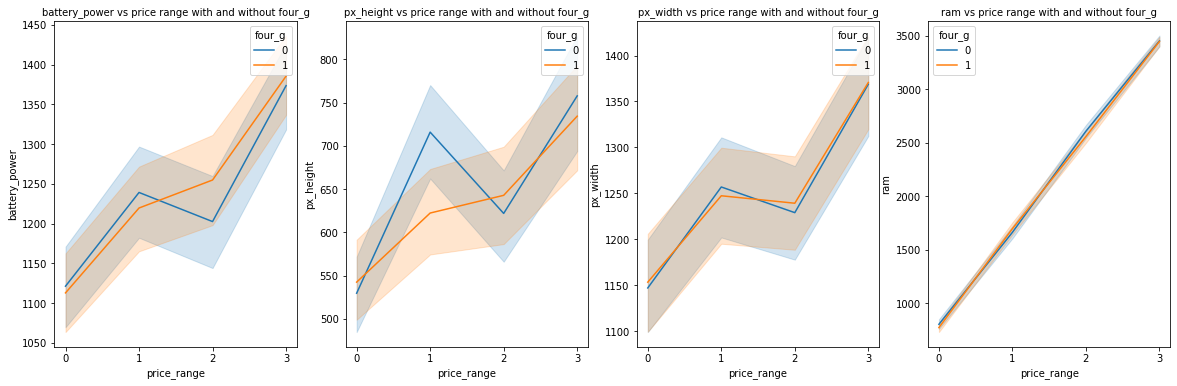

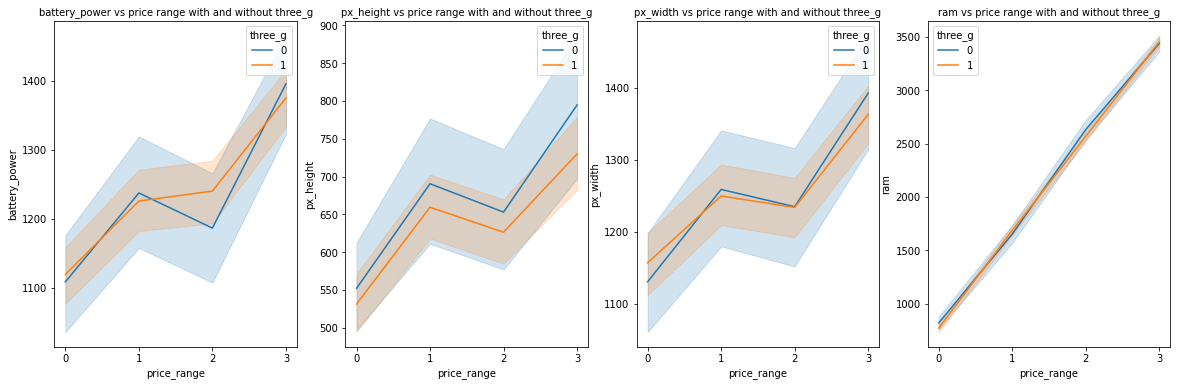

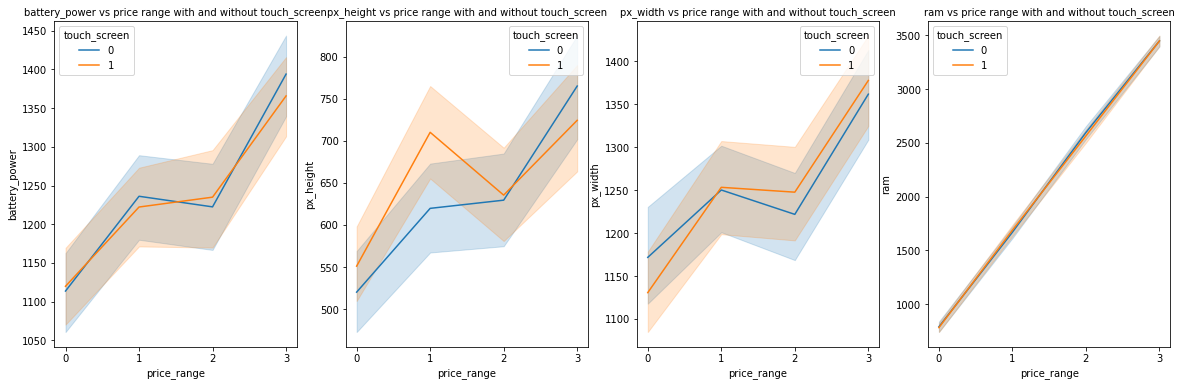

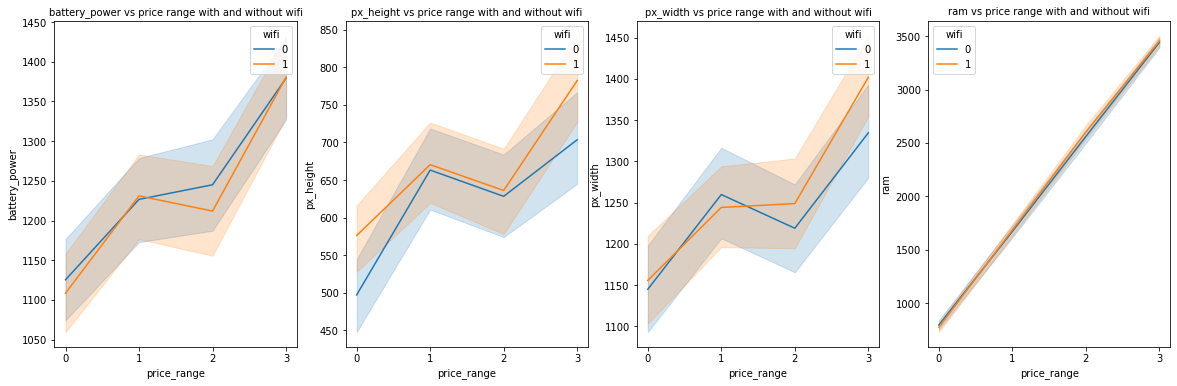

In [30]:
# visualizing price range grouped by these variables with supported and unsupported categories
list1=['blue','dual_sim','four_g','three_g','touch_screen','wifi']
list2=['battery_power','px_height','px_width','ram']
for i in list1:
  plt.figure(figsize=(20,6))
  for index,item in enumerate(list2):
    xtick=[0,1,2,3]
    plt.subplot(1,4,index+1)
    sns.lineplot(x='price_range',y=item,hue=i,data=mobile_df)
    plt.xticks(xtick)
    plt.title(f'{item} vs price range with and without {i}',fontsize=10)

Not much significant changes. All are almost in increasing trend. Pixel height showed decrement from 1 to 2 price range with no bluetooth, no 4g and with touchscreen.

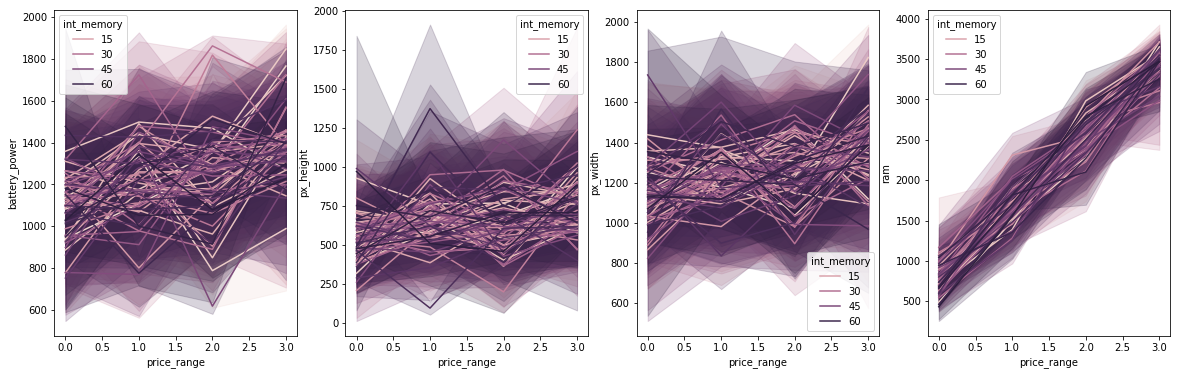

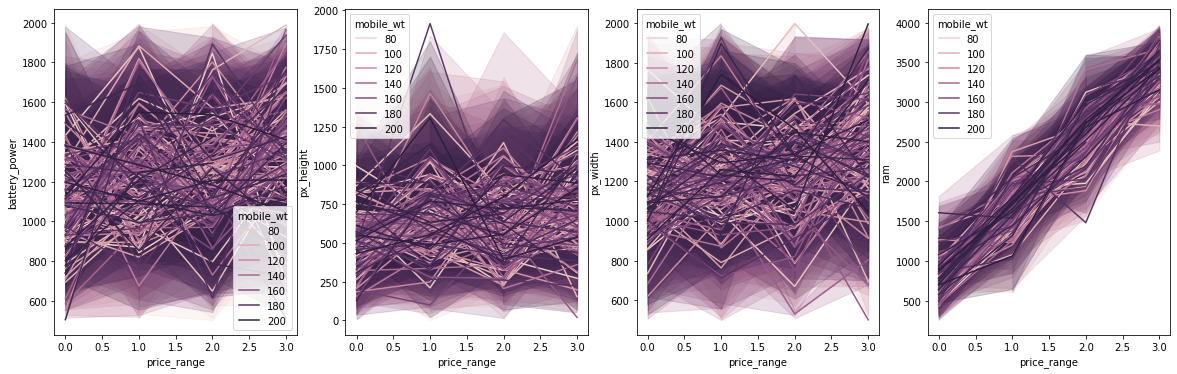

In [31]:
# visualizing price range grouped by these variables with internal memory and mobile weight
list1=['int_memory','mobile_wt']
list2=['battery_power','px_height','px_width','ram']
for i in list1:
  plt.figure(figsize=(20,6))
  for index,item in enumerate(list2):
    plt.subplot(1,4,index+1)
    sns.lineplot(x='price_range',y=item,hue=i,data=mobile_df)

### **Conclusions from our EDA**
Now that we have analysed all the features of our dataset, let us conclude some of the major observations we developed during our analysis.  

1. Each variable is well structured having significant count of phones in each bucket.

2. There is moderate correlation between px_height, px_width and screen height, screen weight. Also ram is strongly correlated with price range.

3. High price range phones have more no. of cores.

4. Most phones have less thickness.

5. Clock speed is less for high range phones.

6. Front and primary camera pixels are increasing with increase in price range.

7. Talktime is more for high range phones.

8. Values of battery power, px_height, px_weight and ram is increasing with increase in price range.

9. All other dichotomous type variables such as bluetooth, wifi, touchscreen, 4g, 3g, dual sim have equal no of phone in each price range bucket.

Having done our eda we can have some intution that all of these features have a role in determining the price range. Variables such as battery power, pixel dimensions and ram are having a strong impact. Dichotomous variables doesnot seem to influence price much.

# **2. Data Wrangling**

Now that we have done our eda let us prepare our dataset to be ready for the modelling. There are some basic steps one should perform before feeding a dataset to an algorithm. We should always check for data integrity and tackle any defects prevelant in the dataset. Hence, data wrangling is considered a major step in which we try to find any missing values, outliers, which can have a drastic impact on the performance of the models. We also try to modify our datasets by adding columns, removing columns, transforming columns, merging datasets and many more.

Lets start by finding any missing values(Nan, null) in our dataset. There are ways in which we can handle missing values like removing them, changing them with mean and median values etc.

### **Missing values**

In [32]:
#checking for missing values in each column
print('The no. of missing values in each variable is:\n')
mobile_df.isnull().sum()

The no. of missing values in each variable is:



battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Great! We dont have any missing values in our dataset. Hence we can proceed further. Let us now check for outliers. 

### **Outliers**

Outliers are those numbers who do not comply with a normal range of values for a variable. These outliers, if left untreated, can make model more biased and result in poor performance.

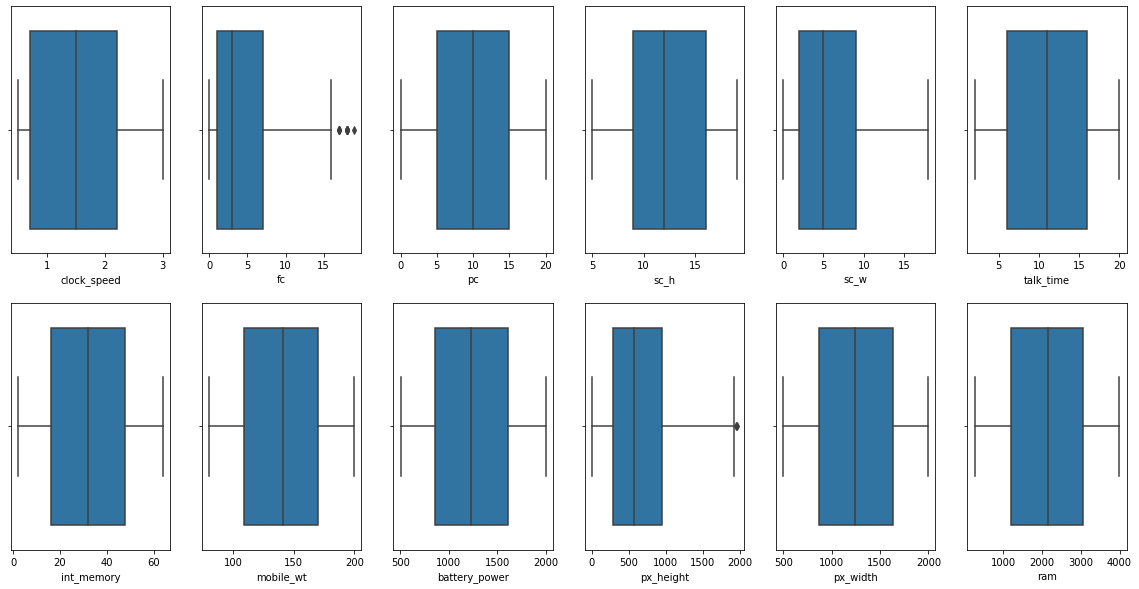

In [33]:
# checking outliers for discrete and continous type variables using box plot
list1=['clock_speed','fc','pc','sc_h','sc_w','talk_time','int_memory','mobile_wt','battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,10))
for index,item in enumerate(list1):
  plt.subplot(2,6,index+1)
  sns.boxplot(mobile_df[item])

Great! It looks like we dont have any outliers except in fc which can be considered negligible as they are not that far away from the maximum value.

### **Modifying columns**

In this section we will try to modify some columns and form new columns. Earlier we saw px_height and px_width were moderately correlated. Also they are dimensions, and we know area is the quantity that expresses the extent of a two-dimensional region. Therefore we will convert 2 columns into single one.

Also we saw sc_h and sc_w were moderately correlated. These are dimentions too. Thus, we will convert these 2 columns into a single one.

Having done this modification will help to reduce the dimensionality of the dataset to an extent and thus model can perform better with reduced computational time.

In [34]:
# making a copy of dataset to make changes
mobile_df_copy=mobile_df.copy()

In [35]:
# checking no. of independent features before modification
print('The no. of independent features before modification is: ',len(mobile_df_copy.columns.to_list())-1)

The no. of independent features before modification is:  20


In [36]:
# creating new column px_area from px_height and px_weight
mobile_df_copy['px_area']=mobile_df_copy['px_height']*mobile_df_copy['px_width']

# creating new column m_volume from sc_h and sc_w and m_dep
mobile_df_copy['m_volume']=mobile_df_copy['sc_h']*mobile_df_copy['sc_w']

In [37]:
# dropping columns
mobile_df_copy.drop(columns=['px_height','px_width','sc_h','sc_w',],inplace=True)

In [38]:
# checking our modifications
mobile_df_copy.head(2)

battery_power  blue  clock_speed  ...  price_range  px_area  m_volume
0            842     0          2.2  ...            1    15120      37.8
1           1021     1          0.5  ...            2  1799140      35.7

[2 rows x 18 columns]

In [39]:
# checking no. of independent features after modification
print('The no. of independent features after modification is: ',len(mobile_df_copy.columns.to_list())-1)

The no. of independent features after modification is:  17


Great! 2 new columns have been added and our independent features have reduced from 20 to 17. Now our dataset is ready for modelling.

# **3. Splitting the data and Standardization**

Last step one should perform before feeding the dataset to machine learning algorithms is to split the data into training and test set. The training set is used to train the model and test set acts as unseen data and is used to evaluate the model performance. Training and test set proportions may vary such as 60:40, 70:30, 75:25 but the norm is 80:20 for training and test set respectively. This is very important in order to check the performance of the model as it might do very good on the training set but perform poor on any unseen data. A model can be considered good if both the training and test performance are somewhat similar.

In [40]:
# creating independent features
X=mobile_df.drop(columns='price_range')

In [41]:
# creating dependent/target variable
y=mobile_df['price_range']

In [42]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # random_state=0 to ensure same observations in each set everytime we run 

In [43]:
# checking the shapes
print(f'The shapes of train and test set for independent variables are: X_train={X_train.shape}, X_test={X_test.shape}')
print(f'The shapes of train and test set for dependent variables are: y_train={y_train.shape}, y_test={y_test.shape}')

The shapes of train and test set for independent variables are: X_train=(1600, 20), X_test=(400, 20)
The shapes of train and test set for dependent variables are: y_train=(1600,), y_test=(400,)


Great! Now that we have splitted our data other important step one should perform, is to standardize or normalize the independent variables. This is to ensure a consistent range of values are fed into the model. Also it make the predictors mean 0 so it is easy to find the intercept. We will be using StandardScaler to standardize our data. It is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1.

In [44]:
# before transformation 
X_train.values

array([[1.232e+03, 0.000e+00, 2.900e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.840e+03, 0.000e+00, 5.000e-01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.692e+03, 0.000e+00, 2.100e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.190e+03, 0.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.191e+03, 0.000e+00, 2.400e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [7.060e+02, 0.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [45]:
# standardizing the independent variables
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [46]:
# after transformation
X_train

array([[-1.60788581e-03, -9.65591606e-01,  1.67103471e+00, ...,
         5.64839529e-01, -9.86343245e-01, -1.02532046e+00],
       [ 1.37407489e+00, -9.65591606e-01, -1.27055019e+00, ...,
        -1.77041434e+00, -9.86343245e-01, -1.02532046e+00],
       [ 1.03920474e+00, -9.65591606e-01,  6.90506414e-01, ...,
         5.64839529e-01,  1.01384584e+00,  9.75304830e-01],
       ...,
       [-9.66386040e-02, -9.65591606e-01,  5.67940376e-01, ...,
        -1.77041434e+00, -9.86343245e-01,  9.75304830e-01],
       [-9.43759679e-02, -9.65591606e-01,  1.05820453e+00, ...,
         5.64839529e-01,  1.01384584e+00,  9.75304830e-01],
       [-1.19175450e+00, -9.65591606e-01, -1.27055019e+00, ...,
         5.64839529e-01, -9.86343245e-01,  9.75304830e-01]])

Great! Now we are ready to fit our models. Lets rock!

# **4. Fitting Models**